<a href="https://colab.research.google.com/github/els326/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [28]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

# note: we won't use count_all in the charts, but we can use it as a check that the subsets all add up to the correct total
count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

In [0]:
count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [32]:

count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [33]:

print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


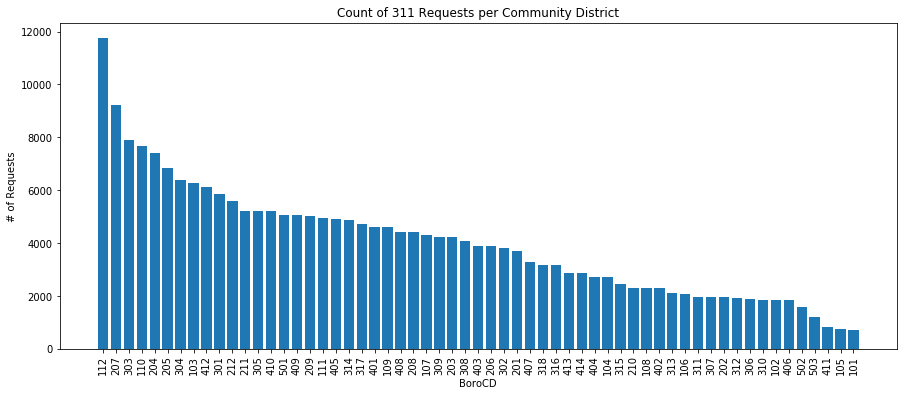

In [36]:
# practice making a regular bar graph

position_on_x = np.arange(len(count_noise))

plt.figure(figsize=(15, 6))


plt.bar(position_on_x, count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests, align='center')
plt.xticks(position_on_x, count_noise.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')

plt.show()

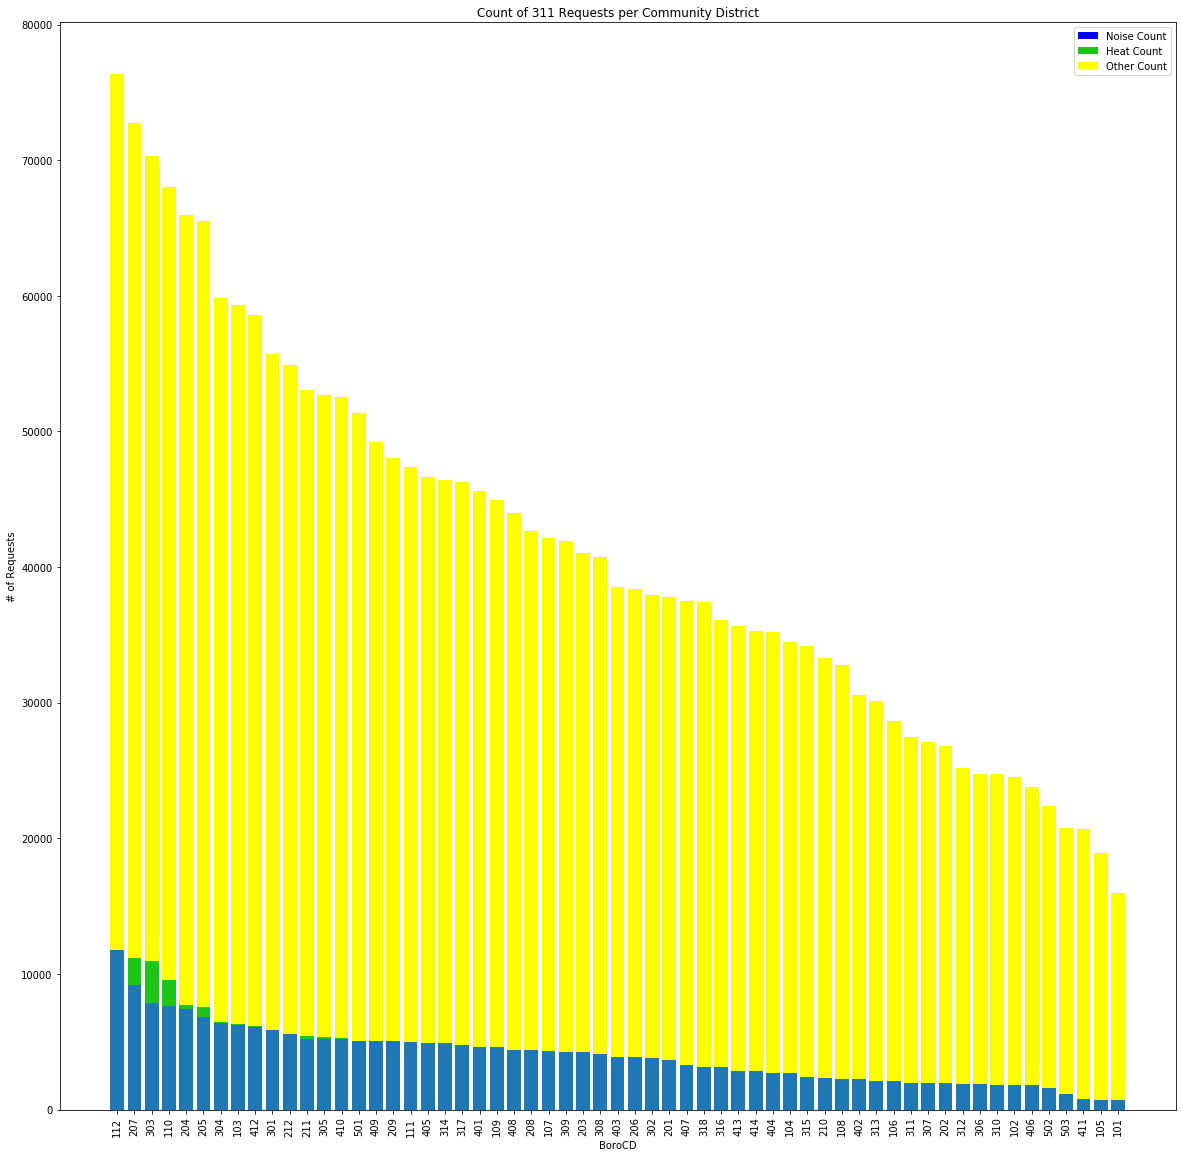

In [50]:
position_on_x = np.arange(len(count_noise))

counts = np.array(count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
counts_2 = np.array(count_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
counts_3 = np.array(count_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

plt.figure(figsize=(20, 20))

plot1 = plt.bar(
  position_on_x,
  counts,
  align='center',
  color='blue',
  label='Noise Count'
)
plot2 = plt.bar(
  position_on_x,
  counts_2,
  bottom=counts, 
  align='center',
  color='#1BC618',
  label='Heat Count'
)
plot3 = plt.bar(
  position_on_x,
  counts_3,
  bottom=counts_2, 
  align='center',
  color='yellow',
  label='Other Count'
)
plt.bar(position_on_x, count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests, align='center')
plt.xticks(position_on_x, count_noise.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend()

plt.show()

In [58]:
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


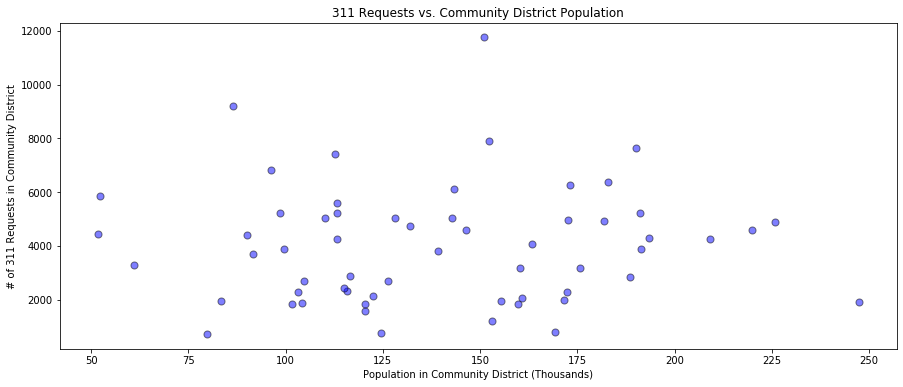

In [61]:
#practice making regular scatter plot

# define the data that will be used
x = np.array(population['2010 Population']/1000)
y = np.array(count_noise.count_of_311_requests)

# define the styling of the scatter plot
color = 'blue' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

In [62]:
noise_list = [population['2010 Population']/1000], [count_noise.count_of_311_requests]

heat_list = [population['2010 Population']/1000], [count_heatwater.count_of_311_requests]

other_list = [population['2010 Population']/1000], [count_other.count_of_311_requests]

print(noise_list)

([0      91.497
1      52.246
2      79.762
3     146.441
4     128.200
5      83.268
6     139.286
7     101.731
8     172.298
9     120.392
10    113.232
11    152.344
12    173.083
13     99.617
14    152.985
15    112.634
16    182.896
17    104.709
18    126.230
19     96.317
20     98.429
21    124.491
22    181.981
23    191.382
24    104.278
25    160.664
26    159.650
27     86.468
28    155.252
29    193.543
30     60.978
31     90.016
32    163.277
33    103.245
34     51.673
35    142.745
36    209.084
37    219.920
38    110.193
39    115.723
40    120.511
41    190.020
42    191.105
43    113.200
44    171.576
45    172.598
46    169.190
47    113.257
48    247.354
49    151.107
50    143.317
51    122.396
52    116.431
53    225.919
54    188.593
55    114.978
56    175.756
57    132.003
58    160.209
Name: 2010 Population, dtype: float64], [1      3691
2      5844
3       722
4      4589
5      5052
6      1939
7      3795
8      1837
9      2279
10     1592
11     4238

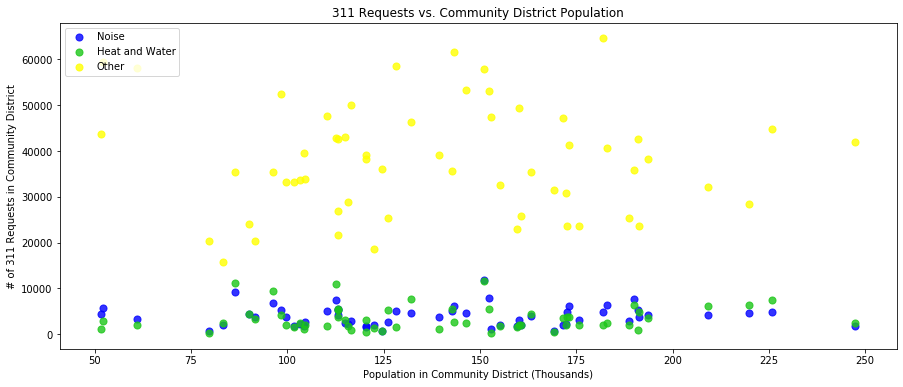

In [63]:
# define the color to be used for the markers for each data subset group
colors = ["blue", "#1BC618", "yellow"]

# define the labels to be used for the data subset group
groups = ["Noise", "Heat and Water", "Other"]

plt.figure(figsize=(15,6))

plt.scatter(
  noise_list[0],
  noise_list[1],
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)
# each new plot gets rendered on top of the previous one
plt.scatter(
  heat_list[0],
  heat_list[1],
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)
plt.scatter(
  other_list[0],
  other_list[1],
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
# loc=4 bottom right
plt.legend(loc=2)

plt.show()

There doesn't seem to be a correlation between population and complaints about noise and heat/hot water. Those types of complaints generally do not increase as population increases. 

This makes me wonder if population density is a factor, especially for noise complaints (i.e. loud neighbors). The community boards are all different sizes, so perhaps those that are larger geographically are also those with higher populations. So even though those communities have large populations, perhaps residents aren't any more disturbed by their neighbors than in smaller communities.

Regarding heat and hot water complaints, I wonder if housing requirements and regulation has something to do with the fact that these types of complaints don't increase as population grows. Perhaps there is a minimum standard of heat and hot water that is maintained in buildings throughout the city, regardless of whether the building is small or large, due to strict regulations.